### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [9]:
print(data.isnull().sum())
print(data.dtypes)
#print(data['car'].unique())
print(data['age'].unique())
print(data['passanger'].unique())
print(data['occupation'].unique())
print(data['maritalStatus'].unique())
print(data['RestaurantLessThan20'].unique())
print(data['income'].unique())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration           

3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
data = data.drop(columns=['car']) # Very few useful values in the car column so dropping it
data.rename(columns={'passanger': 'passenger'}, inplace=True) # Fix spelling mistake on column name

4. What proportion of the total observations chose to accept the coupon?



In [15]:
accepted_coupon = data['Y'].value_counts(normalize=True) # normalize so values show as percentage
print(accepted_coupon)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64


5. Use a bar plot to visualize the `coupon` column.

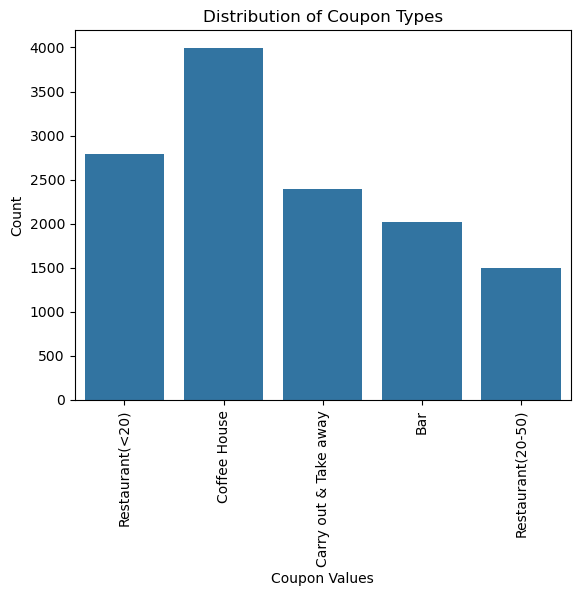

In [18]:
# Bar plot in Seaborn
sns.countplot(x='coupon', data=data)

# Label axis and plot, rotate X axis to more easily read longer type values
plt.title("Distribution of Coupon Types")
plt.xlabel("Coupon Values")
plt.xticks(rotation=90)
plt.ylabel("Count")

# Show plot
plt.show()

6. Use a histogram to visualize the temperature column.

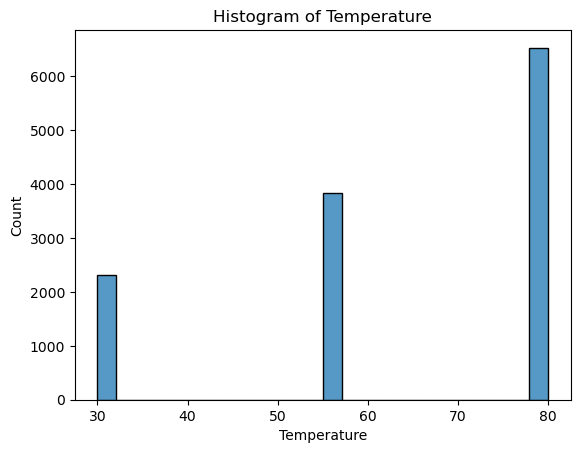

In [21]:
# Histogram plot in Seaborn
sns.histplot(data['temperature'])

# Label axis and plot
plt.title("Histogram of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Count")

# Show plot
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [28]:
# Zero the variables
bar_coupons = None

# Filter just to include coupons where coupon type is Bar
bar_coupons = data[data['coupon'] == 'Bar']
bar_coupons.head()

,destination,passenger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [31]:
# Zero the variables
accepted_coupon = None
accepted_bar_coupon = None

# Assign proportions
accepted_coupon = data['Y'].value_counts(normalize=True) # normalize so values show as percentage
accepted_bar_coupon = bar_coupons['Y'].value_counts(normalize=True) # normalize so values show as percentage

# First print total results, then results of just bar coupons
print(accepted_coupon)
print(accepted_bar_coupon)

Y
1    0.568433
0    0.431567
Name: proportion, dtype: float64
Y
0    0.589985
1    0.410015
Name: proportion, dtype: float64


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [34]:
# Zero the variables
bar_3_or_less = None
bar_more_than_3 = None
acceptance_bar_3_or_less = None
acceptance_bar_more_than_3 = None

# Subset the data for the Bar values that appear to correspond with going to a bar 3 or fewer times vs going more than that
# Ignore nan and other junk results.

bar_3_or_less = data[data['Bar'].isin(['never', 'less1', '1~3'])]  # Values corresponding to going to bar 3 or fewer times
bar_more_than_3 = data[data['Bar'] == '4~8']  # Value corresponding to going to bar more than 3 times

# Calculate the mean of Y for both groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_bar_3_or_less = bar_3_or_less['Y'].mean()
acceptance_bar_more_than_3 = bar_more_than_3['Y'].mean()

# Display results
print(f"Coupon acceptance rate for those who went to a bar 3 or fewer times a month: {acceptance_bar_3_or_less:.2f}")
print(f"Coupon acceptance rate for those who went more frequently than 3 times a month: {acceptance_bar_more_than_3:.2f}")

Coupon acceptance rate for those who went to a bar 3 or fewer times a month: 0.56
Coupon acceptance rate for those who went more frequently than 3 times a month: 0.64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [37]:
# Zero the variables
over_25 = None
over_25_bar_patrons = None
all_others = None
acceptance_over_25_bar_patrons = None
acceptance_others = None

# Values corresponding to 25 and over
over_25 = data[data['age'].isin(['46', '26', '31', '41', '50plus', '36'])]

# Next limit bar patrons
over_25_bar_patrons = over_25[over_25['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Now create a set with everyone else
all_others = data[~data.isin(over_25_bar_patrons)].dropna(how='all')

# Calculate the mean of Y for those groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_over_25_bar_patrons = over_25_bar_patrons['Y'].mean()
acceptance_others = all_others['Y'].mean()

# Display results
print(f"Coupon acceptance rate for those who are over 25 and went 1 or more times a month: {acceptance_over_25_bar_patrons:.2f}")
print(f"Coupon acceptance rate for the whole data set: {acceptance_others:.2f}")

Coupon acceptance rate for those who are over 25 and went 1 or more times a month: 0.62
Coupon acceptance rate for the whole data set: 0.55


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [40]:
# Zero the variables
bar_patrons = None
bar_patron_with_adult_passenger = None
analysis_target = None
all_others = None
acceptance_analysis_target = None
acceptance_others = None

# Values corresponding to bar patrons
bar_patrons = data[data['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Next limit to had passengers that were not a kid
bar_patron_with_adult_passenger = bar_patrons[bar_patrons['passenger'].isin(['Friend(s)','Partner'])]

# Next limit to occupations other than farming, fishing, or forestry
analysis_target = bar_patron_with_adult_passenger[bar_patron_with_adult_passenger['occupation'] != 'Farming Fishing & Forestry']

# calculate all others
all_others = data[~data.isin(analysis_target)].dropna(how='all')

# Calculate the mean of Y for those groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_analysis_target = analysis_target['Y'].mean()
acceptance_others = all_others['Y'].mean()

# Display results
print(f"Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and occupations other than farming, fishing, or forestry: {acceptance_analysis_target:.2f}")
print(f"Coupon acceptance rate for the whole data set: {acceptance_others:.2f}")

Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and occupations other than farming, fishing, or forestry: 0.69
Coupon acceptance rate for the whole data set: 0.55


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [43]:
# Zero the variables
analysis_target_1 = None
analysis_target_2 = None
analysis_target_3 = None
acceptance_analysis_target_1 = None
acceptance_analysis_target_2 = None
acceptance_analysis_target_3 = None

# go to bars more than once a month, had passengers that were not a kid, and were not widowed
analysis_target_1 = data[
    (data['Bar'].isin(['1~3', '4~8', 'gt8'])) & 
    (data['passenger'].isin(['Friend(s)', 'Partner'])) & 
    (data['maritalStatus'] != 'Widowed')
]

# go to bars more than once a month and are under the age of 30
analysis_target_2 = data[
    (data['Bar'].isin(['1~3', '4~8'])) & 
    (data['age'].isin(['21', '26', 'below21']))
]

# go to cheap restaurants more than 4 times a month and income is less than 50K
analysis_target_3 = data[
    (data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & 
    (data['age'].isin(['21', '26', 'below21'])) &
    (data['income'].isin(['$37500 - $49999', '$12500 - $24999', '$25000 - $37499', 'Less than $12500']))
]

# Calculate the mean of Y for those groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_analysis_target_1 = analysis_target_1['Y'].mean()
acceptance_analysis_target_2 = analysis_target_2['Y'].mean()
acceptance_analysis_target_3 = analysis_target_3['Y'].mean()

# Display results
print(f"Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {acceptance_analysis_target_1:.2f}")
print(f"Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30: {acceptance_analysis_target_2:.2f}")
print(f"Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: {acceptance_analysis_target_3:.2f}")

Coupon acceptance rate for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.69
Coupon acceptance rate for drivers who go to bars more than once a month and are under the age of 30: 0.63
Coupon acceptance rate for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.65


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [46]:
# Print conclusion from prior analysis
print("I hypothesize that drivers who regularly go to bars, have a low income, have adult passengers, and/or have no children are more likely to accept the bar coupons.")

I hypothesize that drivers who regularly go to bars, have a low income, have adult passengers, and/or have no children are more likely to accept the bar coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

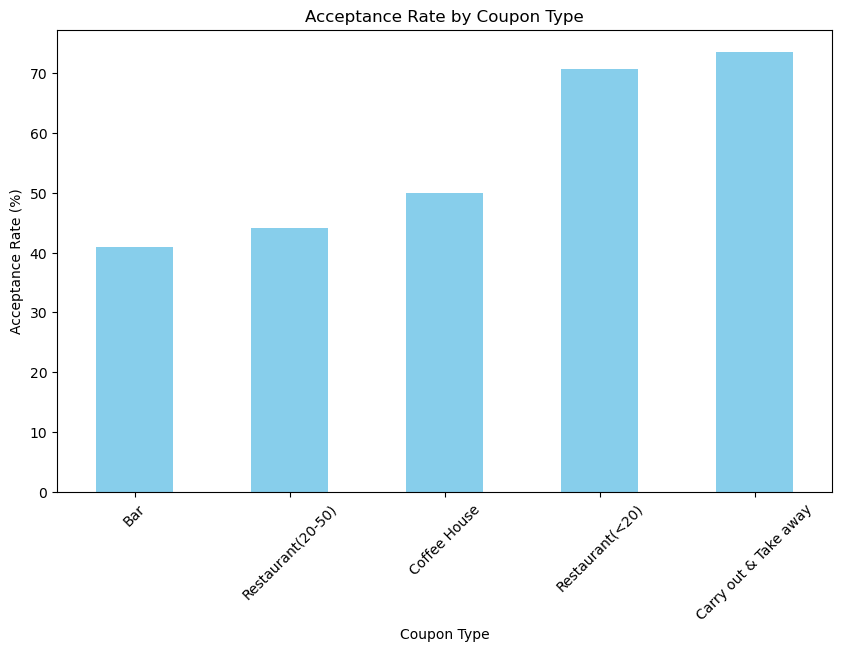

Inexpensive restaurant and carry out are both doing pretty well already.  Let's explore expensive restaurants.


In [49]:
# Zero the variables
acceptance_rate_by_coupon = None

# Group by coupon type and calculate the mean of acceptance (Y=1)
acceptance_rate_by_coupon = data.groupby('coupon')['Y'].mean()

# Convert to percentage
acceptance_rate_by_coupon *= 100

# Optional: Visualize the acceptance rates with a bar plot
import matplotlib.pyplot as plt
acceptance_rate_by_coupon.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Acceptance Rate by Coupon Type')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Coupon Type')
plt.xticks(rotation=45)
plt.show()

# Print conclusion from prior analysis
print("Inexpensive restaurant and carry out are both doing pretty well already.  Let's explore expensive restaurants.")

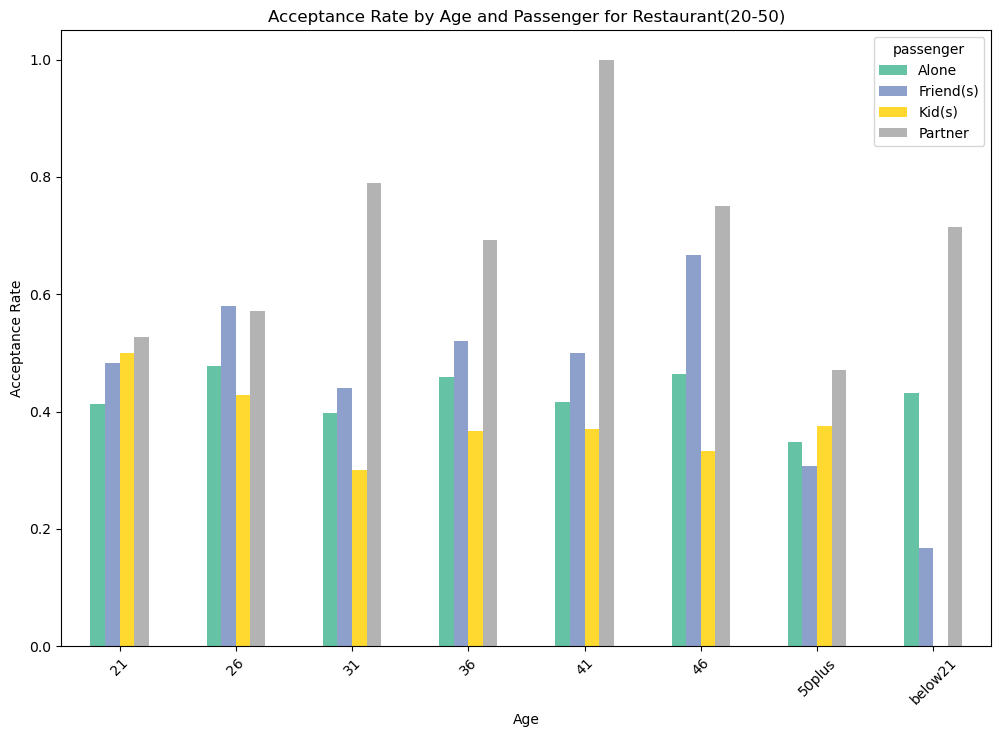

In [51]:
# Zero the variables
expensive_rest = None

# Separate out the expensive restaurants
expensive_rest = data[data['coupon'] == 'Restaurant(20-50)']

# Analyzing 'age' and 'passenger' effect on Y
pivot = expensive_rest.pivot_table(index='age', columns='passenger', values='Y', aggfunc='mean')

# Plot clustered bar plot
pivot.plot(kind='bar', figsize=(12, 8), colormap='Set2')
plt.title('Acceptance Rate by Age and Passenger for Restaurant(20-50)')
plt.ylabel('Acceptance Rate')
plt.xlabel('Age')
plt.xticks(rotation=45)
plt.show()

In [53]:
# Introduce new analysis
print("Looks like passenger type partner acceptance rates are high, especially with drivers 31-46.  Let's take a look at that.")

# Zero the variables
analysis_target_1 = None
all_others = None
acceptance_analysis_target_1 = None
acceptance_all_others = None

# with a partner and drivers 31-46
analysis_target_1 = expensive_rest[
    (expensive_rest['age'].isin(['31', '36', '41', '46'])) & 
    (expensive_rest['passenger'] == 'Partner')
]

# all others
all_others = expensive_rest[~expensive_rest.isin(analysis_target_1)].dropna(how='all')

# Calculate the mean of Y for those groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_analysis_target_1 = analysis_target_1['Y'].mean()
acceptance_all_others = all_others['Y'].mean()

# Display results
print(f"Coupon acceptance rate for drivers 31-46 with a partner: {acceptance_analysis_target_1:.2f}")
print(f"Coupon acceptance rate for everyone else: {acceptance_all_others:.2f}")


Looks like passenger type partner acceptance rates are high, especially with drivers 31-46.  Let's take a look at that.
Coupon acceptance rate for drivers 31-46 with a partner: 0.80
Coupon acceptance rate for everyone else: 0.43


Now let's examine occupation.


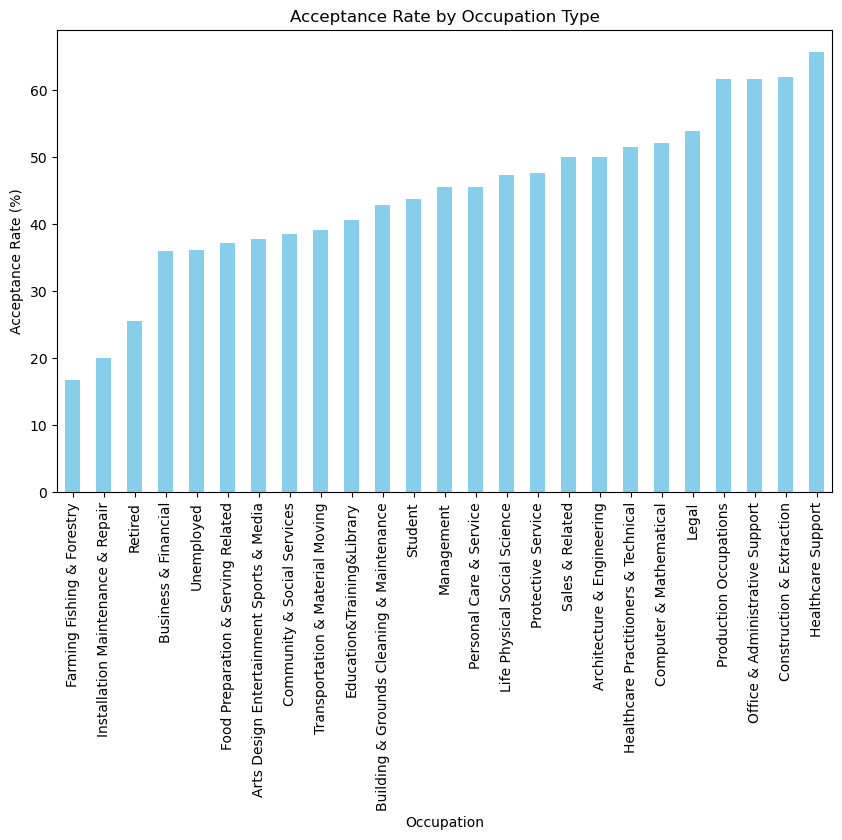

In [55]:
# Introduce new analysis
print("Now let's examine occupation.")

# Zero the variables
acceptance_rate_by_occupation = None

# Group by coupon type and calculate the mean of acceptance (Y=1)
acceptance_rate_by_occupation = expensive_rest.groupby('occupation')['Y'].mean()

# Convert to percentage
acceptance_rate_by_occupation *= 100

# Optional: Visualize the acceptance rates with a bar plot
import matplotlib.pyplot as plt
acceptance_rate_by_occupation.sort_values().plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title('Acceptance Rate by Occupation Type')
plt.ylabel('Acceptance Rate (%)')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.show()

In [70]:
# Introduce new analysis
print("Looks like support personnel acceptance rates are high.  Let's take a look at that.")

# Zero the variables
analysis_target_2 = None
all_others = None
acceptance_analysis_target_2 = None
acceptance_all_others = None

# with a partner and drivers 31-46
analysis_target_2 = expensive_rest[expensive_rest['occupation'].str.contains('support', case=False, na=False)]

# all others
all_others = expensive_rest[~expensive_rest.isin(analysis_target_2)].dropna(how='all')

# Calculate the mean of Y for those groups, which corresponds to the acceptance rate in that group given that Y = 1 or 0
acceptance_analysis_target_2 = analysis_target_2['Y'].mean()
acceptance_all_others = all_others['Y'].mean()

# Display results
print(f"Coupon acceptance rate for occupations with 'support' in title: {acceptance_analysis_target_2:.2f}")
print(f"Coupon acceptance rate for everyone else: {acceptance_all_others:.2f}")

Looks like support personnel acceptance rates are high.  Let's take a look at that.
Coupon acceptance rate for occupations with 'support' in title: 0.63
Coupon acceptance rate for everyone else: 0.43


In [67]:
# Print conclusion from prior analysis
print("I hypothesize that drivers who have their parnter in the car, drivers who are 31-46, and/or drivers who work in 'support' professions are more likely to accept coupons for expensive restaurants.")

I hypothesize that drivers who have their parnter in the car, drivers who are 31-46, and/or drivers who work in 'support' professions are more likely to accept coupons for expensive restaurants.
